# Interferometric intensity constraint
 - This tutorial shows a reconstruction with a reflection dataset measusred with a positive USAF resolution target at 700 nm. The USAF target contains effectively two layers: the front and the back sides of the glass substrate. This tutorial shows by adjusting the forward model in ptychography which takes into account the reflection from the plane glass side, the reconstruction results can be improved significantly. 
 -  This result has been published in the thesis: 'DU, Mengqi. Computational Depth-resolved Imaging and Metrology. 2021. PhD Thesis'. The preprocessed dataset can be downloaded from Figshare: https://figshare.com/articles/dataset/USAF_speckle_bin4_hdf5/14912262
 -  A kind suggestion: check out general tutorials for CPM (conventional ptychographic microscopy) before diving into this one.

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import h5py

In [3]:
# import the PtyLab module
import PtyLab
from PtyLab import ExperimentalData
from PtyLab import Reconstruction
from PtyLab import Monitor
from PtyLab import Params
from PtyLab import Engines
from PtyLab.utils.utils import posit

Step 1: Download the preprocessed data from figshare: https://figshare.com/articles/dataset/USAF_speckle_bin4_hdf5/14912262

In [5]:
# set your data folder as fileFolder 
fileFolder = Path(r"D:\Du\FigshareData")

fileName = "USAF_speckle_bin4.hdf5"
filePath = Path.joinpath(fileFolder,fileName)

In [6]:
experimentalData = ExperimentalData(filePath, operationMode='CPM')
experimentalData.zo = 25.02e-3
experimentalData.entrancePupilDiameter = 0.4e-3  #exampleData.Np / 3 * exampleData.dxp  # initial estimate of beam size
backgroundOffset = 20
experimentalData.ptychogram = posit(experimentalData.ptychogram-backgroundOffset)
experimentalData.showPtychogram()

"Unable to open object (object 'orientation' doesn't exist)"
Min max ptychogram: 0.0, 16202.2021484375
Min max ptychogram: 0.0, 4.209600850219908
0.0 4.209600850219908


In [7]:
# Set monitor properties
monitor = Monitor()
monitor.figureUpdateFrequency = 1
monitor.objectPlot = 'complex'  # complex abs angle
monitor.verboseLevel = 'high'  # high: plot two figures, low: plot only one figure
monitor.probeZoom = 1  # control probe plot FoV
monitor.objectZoom = 2   # control object plot FoV
monitor.objectContrast = 0.8
monitor.probeContrast = 0.5

In [8]:
# Set the reconstruction parameters
params = Params()
## switches
params.gpuSwitch = True
params.positionOrder = 'random'  # 'sequential' or 'random'
params.propagator = 'Fraunhofer'  # Fraunhofer Fresnel ASP scaledASP polychromeASP scaledPolychromeASP
params.probePowerCorrectionSwitch = True
params.comStabilizationSwitch = True
params.fftshiftSwitch = False
params.backgroundModeSwitch = True

In [9]:
reconstruction = Reconstruction(experimentalData, params)
reconstruction.No = 2**11
reconstruction.initialProbe = 'circ'
reconstruction.initialObject = 'ones'
# initialize probe and object and related params
reconstruction.initializeObjectProbe()

# customize initial probe quadratic phase
reconstruction.probe = reconstruction.probe*np.exp(1.j*2*np.pi/reconstruction.wavelength *
                                             (reconstruction.Xp**2+reconstruction.Yp**2)/(3*6e-3))

Copying attribute wavelength
Copying attribute dxd
Copying attribute theta
Copying attribute spectralDensity
Copying attribute entrancePupilDiameter


We first use the standard intensityConstraint, which means that the USAF sample is considered as a thin single-layer object

d:\du\ptylab\PtyLab\Engines\BaseEngine.py:376: UserWarning: fftshiftSwitch set to false, this may lead to reduced performance
  warnings.warn(


<IPython.core.display.Javascript object>


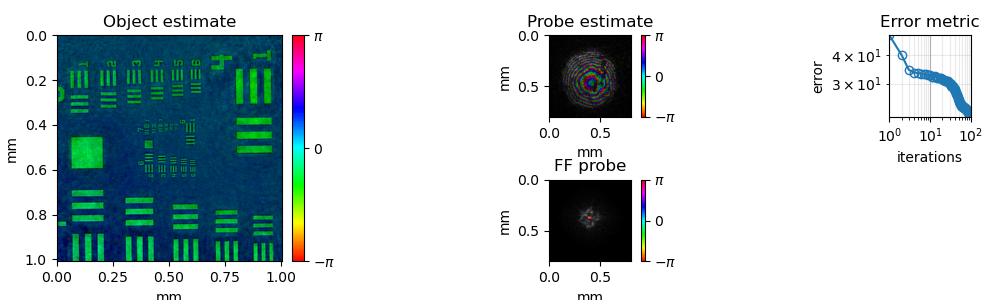

<IPython.core.display.Javascript object>


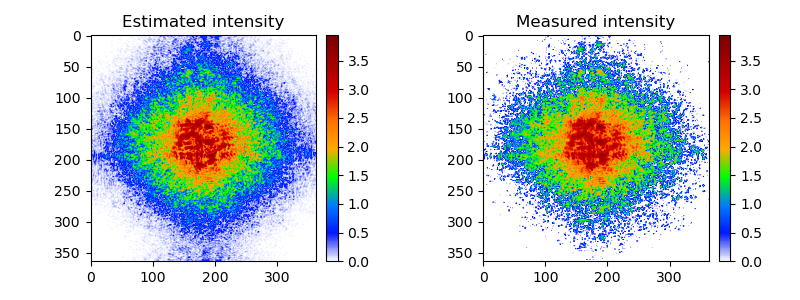

mPIE:   0%|                                                                                    | 0/100 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 235.10it/s]


                                                                                                                       
iteration: 0                                                                                                           
error: 48.7                                                                                                            
estimated linear overlap: 79.7 %                                                                                       
estimated area overlap: 81.3 %                                                                                         
mPIE:   1%|▊                                                                           | 1/100 [00:00<01:28,  1.12it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 502.04it/s]


                                                                                                                       
iteration: 1                                                                                                           
error: 39.9                                                                                                            
estimated linear overlap: 78.2 %                                                                                       
estimated area overlap: 83.5 %                                                                                         
mPIE:   2%|█▌                                                                          | 2/100 [00:01<01:16,  1.28it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 493.72it/s]


                                                                                                                       
iteration: 2                                                                                                           
error: 34.4                                                                                                            
estimated linear overlap: 78.5 %                                                                                       
estimated area overlap: 82.9 %                                                                                         
mPIE:   3%|██▎                                                                         | 3/100 [00:02<01:08,  1.41it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 491.09it/s]


                                                                                                                       
iteration: 3                                                                                                           
error: 33.5                                                                                                            
estimated linear overlap: 78.6 %                                                                                       
estimated area overlap: 82.9 %                                                                                         
mPIE:   4%|███                                                                         | 4/100 [00:02<01:03,  1.51it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 474.53it/s]


                                                                                                                       
iteration: 4                                                                                                           
error: 33.4                                                                                                            
estimated linear overlap: 78.5 %                                                                                       
estimated area overlap: 82.8 %                                                                                         
mPIE:   5%|███▊                                                                        | 5/100 [00:03<00:58,  1.61it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 458.42it/s]


                                                                                                                       
iteration: 5                                                                                                           
error: 33.2                                                                                                            
estimated linear overlap: 78.7 %                                                                                       
estimated area overlap: 82.8 %                                                                                         
mPIE:   6%|████▌                                                                       | 6/100 [00:03<00:55,  1.68it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 457.85it/s]


                                                                                                                       
iteration: 6                                                                                                           
error: 32.9                                                                                                            
estimated linear overlap: 78.6 %                                                                                       
estimated area overlap: 82.4 %                                                                                         
mPIE:   7%|█████▎                                                                      | 7/100 [00:04<00:54,  1.71it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 474.79it/s]


                                                                                                                       
iteration: 7                                                                                                           
error: 32.9                                                                                                            
estimated linear overlap: 78.6 %                                                                                       
estimated area overlap: 82.5 %                                                                                         
mPIE:   8%|██████                                                                      | 8/100 [00:05<00:52,  1.74it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 454.17it/s]


                                                                                                                       
iteration: 8                                                                                                           
error: 32.6                                                                                                            
estimated linear overlap: 78.7 %                                                                                       
estimated area overlap: 82.3 %                                                                                         
mPIE:   9%|██████▊                                                                     | 9/100 [00:05<00:51,  1.75it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 443.67it/s]


                                                                                                                       
iteration: 9                                                                                                           
error: 32.6                                                                                                            
estimated linear overlap: 78.8 %                                                                                       
estimated area overlap: 82.2 %                                                                                         
mPIE:  10%|███████▌                                                                   | 10/100 [00:06<00:50,  1.77it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 506.15it/s]


                                                                                                                       
iteration: 10                                                                                                          
error: 31.9                                                                                                            
estimated linear overlap: 78.9 %                                                                                       
estimated area overlap: 82.1 %                                                                                         
mPIE:  11%|████████▎                                                                  | 11/100 [00:06<00:49,  1.81it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 365.11it/s]


                                                                                                                       
iteration: 11                                                                                                          
error: 32.1                                                                                                            
estimated linear overlap: 78.9 %                                                                                       
estimated area overlap: 82.0 %                                                                                         
mPIE:  12%|█████████                                                                  | 12/100 [00:07<00:50,  1.76it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 469.52it/s]


                                                                                                                       
iteration: 12                                                                                                          
error: 32.2                                                                                                            
estimated linear overlap: 78.9 %                                                                                       
estimated area overlap: 81.9 %                                                                                         
mPIE:  13%|█████████▊                                                                 | 13/100 [00:07<00:48,  1.79it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 483.75it/s]


                                                                                                                       
iteration: 13                                                                                                          
error: 31.9                                                                                                            
estimated linear overlap: 78.9 %                                                                                       
estimated area overlap: 81.9 %                                                                                         
mPIE:  14%|██████████▌                                                                | 14/100 [00:08<00:47,  1.82it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 462.11it/s]


                                                                                                                       
iteration: 14                                                                                                          
error: 31.7                                                                                                            
estimated linear overlap: 79.0 %                                                                                       
estimated area overlap: 81.8 %                                                                                         
mPIE:  15%|███████████▎                                                               | 15/100 [00:08<00:46,  1.83it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 421.14it/s]


                                                                                                                       
iteration: 15                                                                                                          
error: 31.8                                                                                                            
estimated linear overlap: 79.0 %                                                                                       
estimated area overlap: 81.7 %                                                                                         
mPIE:  16%|████████████                                                               | 16/100 [00:09<00:46,  1.82it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 327.93it/s]


                                                                                                                       
iteration: 16                                                                                                          
error: 31.7                                                                                                            
estimated linear overlap: 79.1 %                                                                                       
estimated area overlap: 81.6 %                                                                                         
mPIE:  17%|████████████▊                                                              | 17/100 [00:10<00:47,  1.74it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 462.50it/s]


                                                                                                                       
iteration: 17                                                                                                          
error: 31.6                                                                                                            
estimated linear overlap: 79.2 %                                                                                       
estimated area overlap: 81.7 %                                                                                         
mPIE:  18%|█████████████▌                                                             | 18/100 [00:10<00:46,  1.76it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 461.74it/s]


                                                                                                                       
iteration: 18                                                                                                          
error: 31.4                                                                                                            
estimated linear overlap: 79.2 %                                                                                       
estimated area overlap: 81.6 %                                                                                         
mPIE:  19%|██████████████▎                                                            | 19/100 [00:11<00:45,  1.78it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 463.83it/s]


                                                                                                                       
iteration: 19                                                                                                          
error: 31.4                                                                                                            
estimated linear overlap: 79.2 %                                                                                       
estimated area overlap: 81.6 %                                                                                         
mPIE:  20%|███████████████                                                            | 20/100 [00:11<00:44,  1.79it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 411.60it/s]


                                                                                                                       
iteration: 20                                                                                                          
error: 31.0                                                                                                            
estimated linear overlap: 79.2 %                                                                                       
estimated area overlap: 81.6 %                                                                                         
mPIE:  21%|███████████████▊                                                           | 21/100 [00:12<00:44,  1.78it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 465.94it/s]


                                                                                                                       
iteration: 21                                                                                                          
error: 31.0                                                                                                            
estimated linear overlap: 79.3 %                                                                                       
estimated area overlap: 81.5 %                                                                                         
mPIE:  22%|████████████████▌                                                          | 22/100 [00:12<00:43,  1.78it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 502.90it/s]


                                                                                                                       
iteration: 22                                                                                                          
error: 30.9                                                                                                            
estimated linear overlap: 79.3 %                                                                                       
estimated area overlap: 81.5 %                                                                                         
mPIE:  23%|█████████████████▎                                                         | 23/100 [00:13<00:42,  1.81it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 503.64it/s]


                                                                                                                       
iteration: 23                                                                                                          
error: 30.9                                                                                                            
estimated linear overlap: 79.3 %                                                                                       
estimated area overlap: 81.6 %                                                                                         
mPIE:  24%|██████████████████                                                         | 24/100 [00:13<00:41,  1.83it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 356.84it/s]


                                                                                                                       
iteration: 24                                                                                                          
error: 30.8                                                                                                            
estimated linear overlap: 79.4 %                                                                                       
estimated area overlap: 81.4 %                                                                                         
mPIE:  25%|██████████████████▊                                                        | 25/100 [00:14<00:42,  1.78it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 502.83it/s]


                                                                                                                       
iteration: 25                                                                                                          
error: 30.7                                                                                                            
estimated linear overlap: 79.3 %                                                                                       
estimated area overlap: 80.8 %                                                                                         
mPIE:  26%|███████████████████▌                                                       | 26/100 [00:15<00:40,  1.81it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 432.73it/s]


                                                                                                                       
iteration: 26                                                                                                          
error: 30.7                                                                                                            
estimated linear overlap: 79.4 %                                                                                       
estimated area overlap: 80.7 %                                                                                         
mPIE:  27%|████████████████████▎                                                      | 27/100 [00:15<00:42,  1.73it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 458.14it/s]


                                                                                                                       
iteration: 27                                                                                                          
error: 30.3                                                                                                            
estimated linear overlap: 79.4 %                                                                                       
estimated area overlap: 80.7 %                                                                                         
mPIE:  28%|█████████████████████                                                      | 28/100 [00:16<00:42,  1.70it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 369.44it/s]


                                                                                                                       
iteration: 28                                                                                                          
error: 30.2                                                                                                            
estimated linear overlap: 79.4 %                                                                                       
estimated area overlap: 80.6 %                                                                                         
mPIE:  29%|█████████████████████▊                                                     | 29/100 [00:16<00:41,  1.70it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 502.82it/s]


                                                                                                                       
iteration: 29                                                                                                          
error: 29.7                                                                                                            
estimated linear overlap: 79.4 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  30%|██████████████████████▌                                                    | 30/100 [00:17<00:40,  1.74it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 502.92it/s]


                                                                                                                       
iteration: 30                                                                                                          
error: 30.0                                                                                                            
estimated linear overlap: 79.4 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  31%|███████████████████████▎                                                   | 31/100 [00:17<00:38,  1.77it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 500.55it/s]


                                                                                                                       
iteration: 31                                                                                                          
error: 30.0                                                                                                            
estimated linear overlap: 79.4 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  32%|████████████████████████                                                   | 32/100 [00:18<00:37,  1.82it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 455.99it/s]


                                                                                                                       
iteration: 32                                                                                                          
error: 29.3                                                                                                            
estimated linear overlap: 79.3 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  33%|████████████████████████▊                                                  | 33/100 [00:19<00:36,  1.82it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 367.83it/s]


                                                                                                                       
iteration: 33                                                                                                          
error: 29.3                                                                                                            
estimated linear overlap: 79.3 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  34%|█████████████████████████▌                                                 | 34/100 [00:19<00:37,  1.76it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 479.90it/s]


                                                                                                                       
iteration: 34                                                                                                          
error: 29.1                                                                                                            
estimated linear overlap: 79.2 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  35%|██████████████████████████▎                                                | 35/100 [00:20<00:36,  1.80it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 456.83it/s]


                                                                                                                       
iteration: 35                                                                                                          
error: 29.2                                                                                                            
estimated linear overlap: 79.2 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  36%|███████████████████████████                                                | 36/100 [00:20<00:35,  1.80it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 457.74it/s]


                                                                                                                       
iteration: 36                                                                                                          
error: 28.9                                                                                                            
estimated linear overlap: 79.1 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  37%|███████████████████████████▊                                               | 37/100 [00:21<00:34,  1.80it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 400.75it/s]


                                                                                                                       
iteration: 37                                                                                                          
error: 28.4                                                                                                            
estimated linear overlap: 79.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  38%|████████████████████████████▌                                              | 38/100 [00:21<00:34,  1.77it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 495.53it/s]


                                                                                                                       
iteration: 38                                                                                                          
error: 28.4                                                                                                            
estimated linear overlap: 79.0 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  39%|█████████████████████████████▎                                             | 39/100 [00:22<00:33,  1.80it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 501.00it/s]


                                                                                                                       
iteration: 39                                                                                                          
error: 28.5                                                                                                            
estimated linear overlap: 78.8 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  40%|██████████████████████████████                                             | 40/100 [00:22<00:32,  1.82it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 511.15it/s]


                                                                                                                       
iteration: 40                                                                                                          
error: 27.9                                                                                                            
estimated linear overlap: 78.6 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  41%|██████████████████████████████▋                                            | 41/100 [00:23<00:31,  1.85it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 490.88it/s]


                                                                                                                       
iteration: 41                                                                                                          
error: 27.4                                                                                                            
estimated linear overlap: 78.6 %                                                                                       
estimated area overlap: 79.1 %                                                                                         
mPIE:  42%|███████████████████████████████▌                                           | 42/100 [00:23<00:31,  1.86it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 357.36it/s]


                                                                                                                       
iteration: 42                                                                                                          
error: 27.4                                                                                                            
estimated linear overlap: 78.5 %                                                                                       
estimated area overlap: 78.9 %                                                                                         
mPIE:  43%|████████████████████████████████▎                                          | 43/100 [00:24<00:31,  1.80it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 499.44it/s]


                                                                                                                       
iteration: 43                                                                                                          
error: 27.1                                                                                                            
estimated linear overlap: 78.2 %                                                                                       
estimated area overlap: 79.1 %                                                                                         
mPIE:  44%|█████████████████████████████████                                          | 44/100 [00:25<00:30,  1.82it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 441.30it/s]


                                                                                                                       
iteration: 44                                                                                                          
error: 26.7                                                                                                            
estimated linear overlap: 78.0 %                                                                                       
estimated area overlap: 79.2 %                                                                                         
mPIE:  45%|█████████████████████████████████▊                                         | 45/100 [00:25<00:30,  1.80it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 509.80it/s]


                                                                                                                       
iteration: 45                                                                                                          
error: 26.7                                                                                                            
estimated linear overlap: 77.9 %                                                                                       
estimated area overlap: 79.2 %                                                                                         
mPIE:  46%|██████████████████████████████████▌                                        | 46/100 [00:26<00:29,  1.82it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 352.15it/s]


                                                                                                                       
iteration: 46                                                                                                          
error: 26.2                                                                                                            
estimated linear overlap: 77.7 %                                                                                       
estimated area overlap: 79.3 %                                                                                         
mPIE:  47%|███████████████████████████████████▎                                       | 47/100 [00:26<00:30,  1.74it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 488.03it/s]


                                                                                                                       
iteration: 47                                                                                                          
error: 25.9                                                                                                            
estimated linear overlap: 77.5 %                                                                                       
estimated area overlap: 79.2 %                                                                                         
mPIE:  48%|████████████████████████████████████                                       | 48/100 [00:27<00:29,  1.79it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 501.23it/s]


                                                                                                                       
iteration: 48                                                                                                          
error: 25.7                                                                                                            
estimated linear overlap: 77.3 %                                                                                       
estimated area overlap: 79.1 %                                                                                         
mPIE:  49%|████████████████████████████████████▊                                      | 49/100 [00:27<00:28,  1.81it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 485.14it/s]


                                                                                                                       
iteration: 49                                                                                                          
error: 25.4                                                                                                            
estimated linear overlap: 77.2 %                                                                                       
estimated area overlap: 79.1 %                                                                                         
mPIE:  50%|█████████████████████████████████████▌                                     | 50/100 [00:28<00:27,  1.83it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 357.62it/s]


                                                                                                                       
iteration: 50                                                                                                          
error: 25.3                                                                                                            
estimated linear overlap: 76.9 %                                                                                       
estimated area overlap: 78.2 %                                                                                         
mPIE:  51%|██████████████████████████████████████▎                                    | 51/100 [00:29<00:27,  1.78it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 482.38it/s]


                                                                                                                       
iteration: 51                                                                                                          
error: 24.9                                                                                                            
estimated linear overlap: 76.9 %                                                                                       
estimated area overlap: 78.3 %                                                                                         
mPIE:  52%|███████████████████████████████████████                                    | 52/100 [00:29<00:26,  1.81it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 502.79it/s]


                                                                                                                       
iteration: 52                                                                                                          
error: 24.6                                                                                                            
estimated linear overlap: 76.8 %                                                                                       
estimated area overlap: 78.1 %                                                                                         
mPIE:  53%|███████████████████████████████████████▊                                   | 53/100 [00:30<00:25,  1.83it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 472.26it/s]


                                                                                                                       
iteration: 53                                                                                                          
error: 24.8                                                                                                            
estimated linear overlap: 76.7 %                                                                                       
estimated area overlap: 78.1 %                                                                                         
mPIE:  54%|████████████████████████████████████████▌                                  | 54/100 [00:30<00:25,  1.83it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 438.29it/s]


                                                                                                                       
iteration: 54                                                                                                          
error: 24.5                                                                                                            
estimated linear overlap: 76.6 %                                                                                       
estimated area overlap: 78.1 %                                                                                         
mPIE:  55%|█████████████████████████████████████████▎                                 | 55/100 [00:31<00:24,  1.83it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 345.32it/s]


                                                                                                                       
iteration: 55                                                                                                          
error: 24.4                                                                                                            
estimated linear overlap: 76.6 %                                                                                       
estimated area overlap: 78.0 %                                                                                         
mPIE:  56%|██████████████████████████████████████████                                 | 56/100 [00:31<00:24,  1.77it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 487.88it/s]


                                                                                                                       
iteration: 56                                                                                                          
error: 24.3                                                                                                            
estimated linear overlap: 76.5 %                                                                                       
estimated area overlap: 78.0 %                                                                                         
mPIE:  57%|██████████████████████████████████████████▋                                | 57/100 [00:32<00:23,  1.81it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 499.17it/s]


                                                                                                                       
iteration: 57                                                                                                          
error: 24.1                                                                                                            
estimated linear overlap: 76.4 %                                                                                       
estimated area overlap: 78.0 %                                                                                         
mPIE:  58%|███████████████████████████████████████████▌                               | 58/100 [00:32<00:22,  1.83it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 497.86it/s]


                                                                                                                       
iteration: 58                                                                                                          
error: 23.9                                                                                                            
estimated linear overlap: 76.4 %                                                                                       
estimated area overlap: 78.0 %                                                                                         
mPIE:  59%|████████████████████████████████████████████▎                              | 59/100 [00:33<00:22,  1.86it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 353.21it/s]


                                                                                                                       
iteration: 59                                                                                                          
error: 23.9                                                                                                            
estimated linear overlap: 76.4 %                                                                                       
estimated area overlap: 78.0 %                                                                                         
mPIE:  60%|█████████████████████████████████████████████                              | 60/100 [00:33<00:22,  1.80it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 470.06it/s]


                                                                                                                       
iteration: 60                                                                                                          
error: 23.7                                                                                                            
estimated linear overlap: 76.3 %                                                                                       
estimated area overlap: 78.0 %                                                                                         
mPIE:  61%|█████████████████████████████████████████████▊                             | 61/100 [00:34<00:21,  1.82it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 480.46it/s]


                                                                                                                       
iteration: 61                                                                                                          
error: 24.0                                                                                                            
estimated linear overlap: 76.2 %                                                                                       
estimated area overlap: 78.0 %                                                                                         
mPIE:  62%|██████████████████████████████████████████████▌                            | 62/100 [00:35<00:20,  1.83it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 458.19it/s]


                                                                                                                       
iteration: 62                                                                                                          
error: 23.9                                                                                                            
estimated linear overlap: 76.2 %                                                                                       
estimated area overlap: 78.0 %                                                                                         
mPIE:  63%|███████████████████████████████████████████████▎                           | 63/100 [00:35<00:20,  1.82it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 454.85it/s]


                                                                                                                       
iteration: 63                                                                                                          
error: 23.6                                                                                                            
estimated linear overlap: 76.2 %                                                                                       
estimated area overlap: 77.9 %                                                                                         
mPIE:  64%|████████████████████████████████████████████████                           | 64/100 [00:36<00:19,  1.84it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 457.60it/s]


                                                                                                                       
iteration: 64                                                                                                          
error: 23.7                                                                                                            
estimated linear overlap: 76.1 %                                                                                       
estimated area overlap: 77.9 %                                                                                         
mPIE:  65%|████████████████████████████████████████████████▊                          | 65/100 [00:36<00:18,  1.85it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 464.54it/s]


                                                                                                                       
iteration: 65                                                                                                          
error: 23.4                                                                                                            
estimated linear overlap: 76.0 %                                                                                       
estimated area overlap: 77.9 %                                                                                         
mPIE:  66%|█████████████████████████████████████████████████▌                         | 66/100 [00:37<00:18,  1.87it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 308.03it/s]


                                                                                                                       
iteration: 66                                                                                                          
error: 23.8                                                                                                            
estimated linear overlap: 76.0 %                                                                                       
estimated area overlap: 77.8 %                                                                                         
mPIE:  67%|██████████████████████████████████████████████████▎                        | 67/100 [00:37<00:18,  1.74it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 510.11it/s]


                                                                                                                       
iteration: 67                                                                                                          
error: 23.6                                                                                                            
estimated linear overlap: 76.0 %                                                                                       
estimated area overlap: 77.8 %                                                                                         
mPIE:  68%|███████████████████████████████████████████████████                        | 68/100 [00:38<00:17,  1.80it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 491.93it/s]


                                                                                                                       
iteration: 68                                                                                                          
error: 23.5                                                                                                            
estimated linear overlap: 75.9 %                                                                                       
estimated area overlap: 77.8 %                                                                                         
mPIE:  69%|███████████████████████████████████████████████████▋                       | 69/100 [00:38<00:16,  1.82it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 494.59it/s]


                                                                                                                       
iteration: 69                                                                                                          
error: 23.4                                                                                                            
estimated linear overlap: 75.9 %                                                                                       
estimated area overlap: 77.9 %                                                                                         
mPIE:  70%|████████████████████████████████████████████████████▌                      | 70/100 [00:39<00:16,  1.84it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 345.72it/s]


                                                                                                                       
iteration: 70                                                                                                          
error: 23.5                                                                                                            
estimated linear overlap: 75.8 %                                                                                       
estimated area overlap: 77.8 %                                                                                         
mPIE:  71%|█████████████████████████████████████████████████████▎                     | 71/100 [00:40<00:16,  1.77it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 454.77it/s]


                                                                                                                       
iteration: 71                                                                                                          
error: 23.5                                                                                                            
estimated linear overlap: 75.8 %                                                                                       
estimated area overlap: 77.8 %                                                                                         
mPIE:  72%|██████████████████████████████████████████████████████                     | 72/100 [00:40<00:15,  1.76it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 463.09it/s]


                                                                                                                       
iteration: 72                                                                                                          
error: 23.4                                                                                                            
estimated linear overlap: 75.7 %                                                                                       
estimated area overlap: 77.8 %                                                                                         
mPIE:  73%|██████████████████████████████████████████████████████▊                    | 73/100 [00:41<00:15,  1.79it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 494.20it/s]


                                                                                                                       
iteration: 73                                                                                                          
error: 23.2                                                                                                            
estimated linear overlap: 75.7 %                                                                                       
estimated area overlap: 77.8 %                                                                                         
mPIE:  74%|███████████████████████████████████████████████████████▌                   | 74/100 [00:41<00:14,  1.81it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 459.15it/s]


                                                                                                                       
iteration: 74                                                                                                          
error: 23.2                                                                                                            
estimated linear overlap: 75.7 %                                                                                       
estimated area overlap: 77.8 %                                                                                         
mPIE:  75%|████████████████████████████████████████████████████████▎                  | 75/100 [00:42<00:13,  1.81it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 442.13it/s]


                                                                                                                       
iteration: 75                                                                                                          
error: 23.3                                                                                                            
estimated linear overlap: 75.7 %                                                                                       
estimated area overlap: 77.8 %                                                                                         
mPIE:  76%|█████████████████████████████████████████████████████████                  | 76/100 [00:42<00:13,  1.82it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 451.18it/s]


                                                                                                                       
iteration: 76                                                                                                          
error: 23.3                                                                                                            
estimated linear overlap: 75.6 %                                                                                       
estimated area overlap: 77.9 %                                                                                         
mPIE:  77%|█████████████████████████████████████████████████████████▊                 | 77/100 [00:43<00:12,  1.82it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 461.28it/s]


                                                                                                                       
iteration: 77                                                                                                          
error: 23.1                                                                                                            
estimated linear overlap: 75.6 %                                                                                       
estimated area overlap: 77.9 %                                                                                         
mPIE:  78%|██████████████████████████████████████████████████████████▌                | 78/100 [00:43<00:11,  1.85it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 352.23it/s]


                                                                                                                       
iteration: 78                                                                                                          
error: 23.1                                                                                                            
estimated linear overlap: 75.6 %                                                                                       
estimated area overlap: 77.8 %                                                                                         
mPIE:  79%|███████████████████████████████████████████████████████████▎               | 79/100 [00:44<00:11,  1.78it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 501.70it/s]


                                                                                                                       
iteration: 79                                                                                                          
error: 22.9                                                                                                            
estimated linear overlap: 75.5 %                                                                                       
estimated area overlap: 77.9 %                                                                                         
mPIE:  80%|████████████████████████████████████████████████████████████               | 80/100 [00:44<00:11,  1.82it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 451.94it/s]


                                                                                                                       
iteration: 80                                                                                                          
error: 23.1                                                                                                            
estimated linear overlap: 75.4 %                                                                                       
estimated area overlap: 77.8 %                                                                                         
mPIE:  81%|████████████████████████████████████████████████████████████▊              | 81/100 [00:45<00:10,  1.81it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 457.39it/s]


                                                                                                                       
iteration: 81                                                                                                          
error: 22.8                                                                                                            
estimated linear overlap: 75.4 %                                                                                       
estimated area overlap: 77.7 %                                                                                         
mPIE:  82%|█████████████████████████████████████████████████████████████▍             | 82/100 [00:46<00:09,  1.82it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 330.93it/s]


                                                                                                                       
iteration: 82                                                                                                          
error: 22.9                                                                                                            
estimated linear overlap: 75.4 %                                                                                       
estimated area overlap: 77.8 %                                                                                         
mPIE:  83%|██████████████████████████████████████████████████████████████▎            | 83/100 [00:46<00:09,  1.75it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 454.95it/s]


                                                                                                                       
iteration: 83                                                                                                          
error: 22.7                                                                                                            
estimated linear overlap: 75.4 %                                                                                       
estimated area overlap: 77.7 %                                                                                         
mPIE:  84%|███████████████████████████████████████████████████████████████            | 84/100 [00:47<00:08,  1.78it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 497.54it/s]


                                                                                                                       
iteration: 84                                                                                                          
error: 22.5                                                                                                            
estimated linear overlap: 75.3 %                                                                                       
estimated area overlap: 77.7 %                                                                                         
mPIE:  85%|███████████████████████████████████████████████████████████████▊           | 85/100 [00:47<00:08,  1.81it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 514.51it/s]


                                                                                                                       
iteration: 85                                                                                                          
error: 22.7                                                                                                            
estimated linear overlap: 75.3 %                                                                                       
estimated area overlap: 77.7 %                                                                                         
mPIE:  86%|████████████████████████████████████████████████████████████████▌          | 86/100 [00:48<00:07,  1.85it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 466.36it/s]


                                                                                                                       
iteration: 86                                                                                                          
error: 22.5                                                                                                            
estimated linear overlap: 75.2 %                                                                                       
estimated area overlap: 77.6 %                                                                                         
mPIE:  87%|█████████████████████████████████████████████████████████████████▎         | 87/100 [00:48<00:07,  1.85it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 454.27it/s]


                                                                                                                       
iteration: 87                                                                                                          
error: 22.6                                                                                                            
estimated linear overlap: 75.1 %                                                                                       
estimated area overlap: 77.6 %                                                                                         
mPIE:  88%|██████████████████████████████████████████████████████████████████         | 88/100 [00:49<00:06,  1.84it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 453.08it/s]


                                                                                                                       
iteration: 88                                                                                                          
error: 22.2                                                                                                            
estimated linear overlap: 75.1 %                                                                                       
estimated area overlap: 77.5 %                                                                                         
mPIE:  89%|██████████████████████████████████████████████████████████████████▊        | 89/100 [00:49<00:05,  1.84it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 353.64it/s]


                                                                                                                       
iteration: 89                                                                                                          
error: 22.3                                                                                                            
estimated linear overlap: 75.0 %                                                                                       
estimated area overlap: 77.4 %                                                                                         
mPIE:  90%|███████████████████████████████████████████████████████████████████▌       | 90/100 [00:50<00:05,  1.79it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 456.87it/s]


                                                                                                                       
iteration: 90                                                                                                          
error: 22.3                                                                                                            
estimated linear overlap: 75.0 %                                                                                       
estimated area overlap: 77.4 %                                                                                         
mPIE:  91%|████████████████████████████████████████████████████████████████████▎      | 91/100 [00:51<00:05,  1.77it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 483.09it/s]


                                                                                                                       
iteration: 91                                                                                                          
error: 21.9                                                                                                            
estimated linear overlap: 74.9 %                                                                                       
estimated area overlap: 77.4 %                                                                                         
mPIE:  92%|█████████████████████████████████████████████████████████████████████      | 92/100 [00:51<00:04,  1.81it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 494.22it/s]


                                                                                                                       
iteration: 92                                                                                                          
error: 22.2                                                                                                            
estimated linear overlap: 74.9 %                                                                                       
estimated area overlap: 77.4 %                                                                                         
mPIE:  93%|█████████████████████████████████████████████████████████████████████▊     | 93/100 [00:52<00:03,  1.81it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 330.45it/s]


                                                                                                                       
iteration: 93                                                                                                          
error: 22.1                                                                                                            
estimated linear overlap: 74.8 %                                                                                       
estimated area overlap: 77.4 %                                                                                         
mPIE:  94%|██████████████████████████████████████████████████████████████████████▌    | 94/100 [00:52<00:03,  1.74it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 507.77it/s]


                                                                                                                       
iteration: 94                                                                                                          
error: 22.0                                                                                                            
estimated linear overlap: 74.8 %                                                                                       
estimated area overlap: 77.3 %                                                                                         
mPIE:  95%|███████████████████████████████████████████████████████████████████████▎   | 95/100 [00:53<00:02,  1.78it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 507.41it/s]


                                                                                                                       
iteration: 95                                                                                                          
error: 21.8                                                                                                            
estimated linear overlap: 74.8 %                                                                                       
estimated area overlap: 77.3 %                                                                                         
mPIE:  96%|████████████████████████████████████████████████████████████████████████   | 96/100 [00:53<00:02,  1.81it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 484.39it/s]


                                                                                                                       
iteration: 96                                                                                                          
error: 21.8                                                                                                            
estimated linear overlap: 74.7 %                                                                                       
estimated area overlap: 77.3 %                                                                                         
mPIE:  97%|████████████████████████████████████████████████████████████████████████▊  | 97/100 [00:54<00:01,  1.83it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 372.74it/s]


                                                                                                                       
iteration: 97                                                                                                          
error: 21.6                                                                                                            
estimated linear overlap: 74.6 %                                                                                       
estimated area overlap: 77.3 %                                                                                         
mPIE:  98%|█████████████████████████████████████████████████████████████████████████▌ | 98/100 [00:54<00:01,  1.77it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 440.02it/s]


                                                                                                                       
iteration: 98                                                                                                          
error: 21.6                                                                                                            
estimated linear overlap: 74.6 %                                                                                       
estimated area overlap: 77.2 %                                                                                         
mPIE:  99%|██████████████████████████████████████████████████████████████████████████▎| 99/100 [00:55<00:00,  1.78it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 451.73it/s]


                                                                                                                       
iteration: 99                                                                                                          
error: 21.5                                                                                                            
estimated linear overlap: 74.6 %                                                                                       
estimated area overlap: 77.3 %                                                                                         
mPIE: 100%|██████████████████████████████████████████████████████████████████████████| 100/100 [00:56<00:00,  1.78it/s]


In [10]:

params.intensityConstraint = 'standard'  

mPIE = Engines.mPIE(reconstruction, experimentalData, params, monitor)
mPIE.numIterations = 100
mPIE.betaProbe = 0.05
mPIE.betaObject = 0.25
mPIE.reconstruct()

Now we switch to interferometric constraint, which takes into account the extra reflection from the plane side of the USAF glass substrate, and treats it as an external 'reference'. The results show that the noise in object reconstruction is significantly cleaned up.

<IPython.core.display.Javascript object>


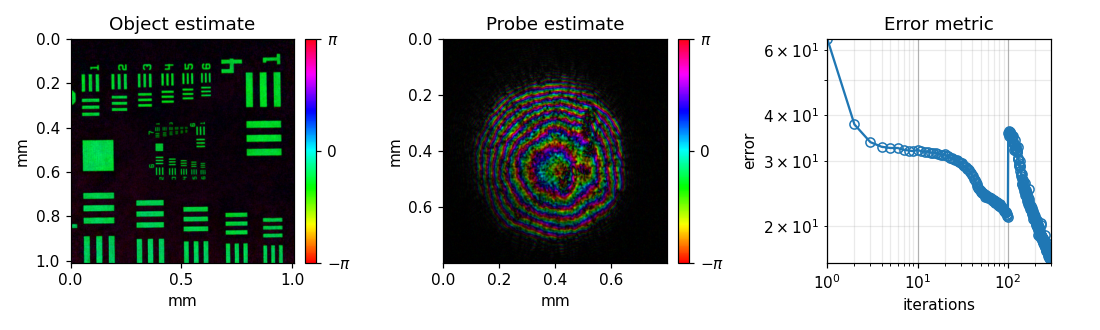

<IPython.core.display.Javascript object>


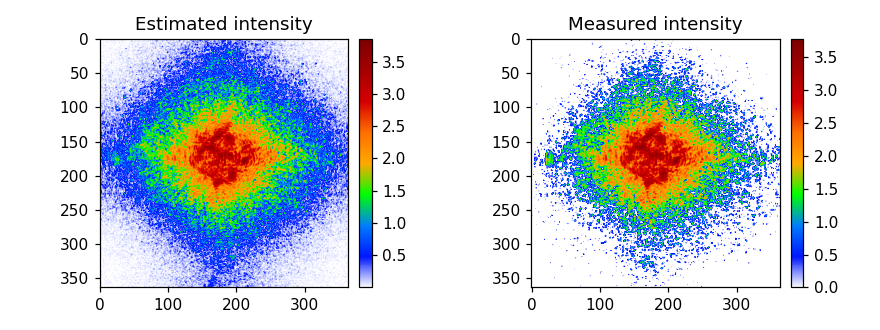

                                                                                                                       
iteration: 0                                                                                                           
error: 35.7                                                                                                            
estimated linear overlap: 75.0 %                                                                                       
estimated area overlap: 74.9 %                                                                                         
                                                                                                                       
iteration: 1                                                                                                           
error: 35.0                                                                                                            
estimated linear overlap: 75.0 %        

iteration: 27                                                                                                          
error: 32.7                                                                                                            
estimated linear overlap: 75.3 %                                                                                       
estimated area overlap: 74.9 %                                                                                         
                                                                                                                       
iteration: 28                                                                                                          
error: 30.6                                                                                                            
estimated linear overlap: 74.6 %                                                                                       
estimated area overlap: 74.6 %          

error: 25.1                                                                                                            
estimated linear overlap: 74.5 %                                                                                       
estimated area overlap: 73.7 %                                                                                         
                                                                                                                       
iteration: 55                                                                                                          
error: 24.2                                                                                                            
estimated linear overlap: 74.4 %                                                                                       
estimated area overlap: 73.8 %                                                                                         
                                        

estimated linear overlap: 74.2 %                                                                                       
estimated area overlap: 75.4 %                                                                                         
                                                                                                                       
iteration: 82                                                                                                          
error: 21.7                                                                                                            
estimated linear overlap: 74.3 %                                                                                       
estimated area overlap: 75.6 %                                                                                         
                                                                                                                       
iteration: 83                           

estimated area overlap: 75.5 %                                                                                         
                                                                                                                       
iteration: 109                                                                                                         
error: 20.1                                                                                                            
estimated linear overlap: 74.2 %                                                                                       
estimated area overlap: 75.4 %                                                                                         
                                                                                                                       
iteration: 110                                                                                                         
error: 20.1                             

                                                                                                                       
iteration: 136                                                                                                         
error: 18.7                                                                                                            
estimated linear overlap: 74.1 %                                                                                       
estimated area overlap: 75.4 %                                                                                         
                                                                                                                       
iteration: 137                                                                                                         
error: 18.5                                                                                                            
estimated linear overlap: 74.0 %        

iteration: 163                                                                                                         
error: 17.2                                                                                                            
estimated linear overlap: 74.0 %                                                                                       
estimated area overlap: 74.2 %                                                                                         
                                                                                                                       
iteration: 164                                                                                                         
error: 17.5                                                                                                            
estimated linear overlap: 74.1 %                                                                                       
estimated area overlap: 74.1 %          

error: 16.4                                                                                                            
estimated linear overlap: 73.9 %                                                                                       
estimated area overlap: 74.2 %                                                                                         
                                                                                                                       
iteration: 191                                                                                                         
error: 16.4                                                                                                            
estimated linear overlap: 73.8 %                                                                                       
estimated area overlap: 74.4 %                                                                                         
                                        

In [9]:
params.intensityConstraint = 'interferometric'  

mPIE = Engines.mPIE(reconstruction, experimentalData, params, monitor)
mPIE.numIterations = 200
mPIE.betaProbe = 0.25
mPIE.betaObject = 0.25
mPIE.reconstruct()

In [9]:
## now save the data
# reconstruction.saveResults('reconstruction.hdf5')